In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d saisriteja/cervicalcancer

 93% 124M/133M [00:01<00:00, 64.6MB/s]
100% 133M/133M [00:01<00:00, 78.5MB/s]
 93% 124M/133M [00:01<00:00, 64.6MB/s]
100% 133M/133M [00:01<00:00, 78.5MB/s]


In [ ]:
!unzip /content/cervicalcancer.zip

Archive:  /content/cervicalcancer.zip
  inflating: boxes/ObjectMarker2.py  
  inflating: boxes/Type_1_bbox.tsv   
  inflating: boxes/Type_2_bboxes.tsv  
  inflating: boxes/Type_3_bbox.tsv   
  inflating: boxes/type1.txt         
  inflating: boxes/type2.txt         
  inflating: boxes/type3.txt         
  inflating: data/trainType_1.pkl    
  inflating: data/trainType_2.pkl    
  inflating: data/trainType_3.pkl    


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
!pip install q keras==2.2.5

     |████████████████████████████████| 337kB 19.3MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
import pickle
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
from tqdm import  tqdm
def getdata(f,files,imgs,shape,types):
    d = []
    for x in tqdm(f):
        #print(x)
        
        i = x.split()
        x = i[2:]
        x = [int(y) for y in x]
        name = i[0].split('\\')[1]
        position_file = files.index(name)
        #print(shapes[position_file])

        images,shape = imgs[position_file],shapes[position_file]
        w,h,_ = shape
        w,h = 200/w,200/h
        
        no = i[1]
        
        temp_data = []
        
        for j in range(int(no)):
            pp = [x[2*j]*w,x[2*j+1]*h,x[2*j+2]*w,x[2*j+3]*h]
            pp = [int(y) for y in pp]
            temp_data.append([name,pp,types])
            #print(name,pp)
        d.extend(temp_data)
        
    return d

In [ ]:
img_data = load_obj('data/trainType_1')
length = len(img_data)
print('total_samples',length)
files = list(map(lambda x:x[0] , img_data))
imgs = list(map(lambda x:x[1] , img_data))
shapes= list(map(lambda x:x[2] , img_data))


files_imgs1 = {}
for i,j in zip(files,imgs):
    files_imgs1[i] = j
    


f = open("boxes/type1.txt", "r")
test1_data = getdata(f,files,imgs,shapes,"type1")
print("total no of bounding boxes",len(test1_data))

249it [00:00, 73228.28it/s]

total_samples 250
total no of bounding boxes 251


In [ ]:
img_data = load_obj('data/trainType_2')
length = len(img_data)
print('total_samples',length)
files = list(map(lambda x:x[0] , img_data))
imgs = list(map(lambda x:x[1] , img_data))
shapes= list(map(lambda x:x[2] , img_data))

files_imgs2 = {}
for i,j in zip(files,imgs):
    files_imgs2[i] = j
    


f = open("boxes/type2.txt", "r")
test2_data = getdata(f,files,imgs,shapes,"type2")
print("total no of bounding boxes",len(test2_data))

772it [00:00, 71613.46it/s]

total_samples 781
total no of bounding boxes 772


In [ ]:
img_data = load_obj('data/trainType_3')
length = len(img_data)
print('total_samples',length)
files = list(map(lambda x:x[0] , img_data))
imgs = list(map(lambda x:x[1] , img_data))
shapes= list(map(lambda x:x[2] , img_data))

files_imgs3 = {}
for i,j in zip(files,imgs):
    files_imgs3[i] = j
    


f = open("boxes/type3.txt", "r")
test3_data = getdata(f,files,imgs,shapes,"type3")
print("total no of bounding boxes",len(test3_data))

445it [00:00, 106175.85it/s]

total_samples 450
total no of bounding boxes 445


In [ ]:
print(test1_data[0])
print(test2_data[0])
print(test3_data[0])

['0.jpg', [54, 78, 63, 90], 'type1']
['1.jpg', [56, 148, 30, 33], 'type2']
['1000.jpg', [57, 77, 33, 41], 'type3']


In [ ]:
import cv2
img = cv2.imread('/content/cervical.PNG')
img = cv2.resize(img, (200,200)) 
img.shape
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64,64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=imgs)

In [ ]:
test4_data = []
files_imgs4 = {}
for i in range(len(images_aug)):
  name = str(10000*(i+1))+'.jpg'
  imgg = images_aug[i]
  box = [0,0,0,0]
  ty = 'normal'
  test4_data.append([name,box,ty])
  files_imgs4[name] = imgg


In [ ]:
print(test4_data[0])

['10000.jpg', [0, 0, 0, 0], 'normal']


In [ ]:
def types(n):
  if n == 'type1':
    return 1
  elif n == 'type2':
    return 2
  elif n == 'type3':
    return 3
  elif n == 'normal':
    return 0

complete_data = {}
def fillit(nn):
  for i in nn:
    name = i[0]
    x = i[1][0]
    y = i[1][1]
    width = i[1][2]
    height = i[1][3]
    Target =  types(i[2])

    complete_data[name] = [x,y,width,height,Target]

fillit(test1_data)
fillit(test2_data)
fillit(test3_data)
fillit(test4_data)

In [ ]:
complete_image_data = {}
complete_image_data = {**files_imgs3,**files_imgs2}
complete_image_data = {**complete_image_data,**files_imgs1}
complete_image_data = {**complete_image_data,**files_imgs4}

In [ ]:
import os 
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd 
import glob
from sklearn.model_selection import KFold

In [ ]:
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('/content/Mask_RCNN')

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
!mkdir imagedata

mkdir: cannot create directory ‘imagedata’: File exists


In [ ]:
os.chdir('/content/Mask_RCNN')

In [ ]:
import cv2
for i in tqdm(complete_image_data.keys()):
  cv2.imwrite('/content/Mask_RCNN/imagedata/'+i,complete_image_data[i])

100%|██████████| 1931/1931 [00:01<00:00, 1032.01it/s]


In [ ]:
ROOT_DIR = '/content'
sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [ ]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "mask_rcnn_coco.h5"

-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


In [ ]:
# These are not optimal 

class DetectorConfig(Config):
    """Configuration for training pneumonia detection on the RSNA pneumonia dataset.
    Overrides values in the base Config class.
    """
    
    # Give the configuration a recognizable name  
    NAME = 'cervical'
    
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8
    
    BACKBONE = 'resnet50'
    
    NUM_CLASSES = 1+3  # background + 3 cervical classes
    
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 200

config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [ ]:
dd = []
for i in list(complete_data.keys()):
  x,y,w,d,t = complete_data[i]
  dd.append([i,x,y,w,d,t])
print(dd[0])

['0.jpg', 63, 90, 54, 78, 1]


In [ ]:
dd[-1]

['4500000.jpg', 0, 0, 0, 0, 0]

In [ ]:
dd[-3:-1]

[['4480000.jpg', 0, 0, 0, 0, 0], ['4490000.jpg', 0, 0, 0, 0, 0]]

In [ ]:
os.getcwd()

'/content/Mask_RCNN'

In [ ]:
import pandas as pd
data = pd.DataFrame(dd, columns=['patientId', 'x', 'y', 'width', 'height', 'Target'])
data.to_csv('data.csv')

In [ ]:
# training dataset
anns = pd.read_csv('/content/Mask_RCNN/data.csv')
anns.head()

,Unnamed: 0,patientId,x,y,width,height,Target
0,0,0.jpg,63,90,54,78,1
1,1,10.jpg,47,151,50,46,1
2,2,1013.jpg,37,117,47,67,1
3,3,1014.jpg,45,70,63,89,1
4,4,1019.jpg,37,106,60,95,1


In [ ]:
anns['Target'].value_counts()

2    772
0    450
3    445
1    249
Name: Target, dtype: int64

In [ ]:
anns.tail()

,Unnamed: 0,patientId,x,y,width,height,Target
1911,1911,4460000.jpg,0,0,0,0,0
1912,1912,4470000.jpg,0,0,0,0,0
1913,1913,4480000.jpg,0,0,0,0,0
1914,1914,4490000.jpg,0,0,0,0,0
1915,1915,4500000.jpg,0,0,0,0,0


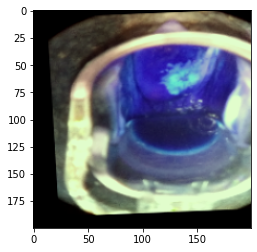

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(complete_image_data['4500000.jpg'])

In [ ]:
anns.isna().sum()

Unnamed: 0    0
patientId     0
x             0
y             0
width         0
height        0
Target        0
dtype: int64

In [ ]:
annsa = anns.fillna(3)

In [ ]:
dicom_dir = '/content/Mask_RCNN/imagedata'

In [ ]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.jpg')
    return list(set(dicom_fps))

def parse_dataset(dicom_dir, anns): 
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for fp in image_fps}
    for index, row in anns.iterrows(): 
        fp = os.path.join(dicom_dir, row['patientId'])
        image_annotations[fp].append(row)
    #print(np.array(image_annotations))
    return image_fps, image_annotations 

In [ ]:
ORIG_SIZE = 200

In [ ]:
train_dicom_dir = '/content/Mask_RCNN/imagedata'
image_fps, image_annotations = parse_dataset(train_dicom_dir, anns=anns)

In [ ]:
image_fps_list = list(image_fps)
random.seed(42)
random.shuffle(image_fps_list)
val_size = 300
image_fps_val = image_fps_list[:val_size]
image_fps_train = image_fps_list[val_size:]

print(len(image_fps_train), len(image_fps_val))
# print(image_fps_val[:6])

1631 300


In [ ]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('cervical', 1, 'type1')
        self.add_class('cervical', 2, 'type2')
        self.add_class('cervical', 3, 'type3')
        
        # add images 
        for i, fp in enumerate(image_fps):
            annotations = image_annotations[fp]
            self.add_image('cervical', image_id=i, path=fp, 
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)
            
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        ds = cv2.imread(fp)
        image = ds
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                if a['Target'] == 1:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 1
                elif a['Target'] == 2:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 2
                elif a['Target'] == 3:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 3
                elif a['Target'] == 0:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 0
                

        return mask.astype(np.bool), class_ids.astype(np.int32)

In [ ]:
dataset_train = DetectorDataset(image_fps_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

In [ ]:
test_fp = random.choice(image_fps_train)
image_annotations[test_fp]

[Unnamed: 0        1027
 patientId     1015.jpg
 x                   37
 y                   96
 width               51
 height              57
 Target               3
 Name: 1027, dtype: object]

In [ ]:
dataset_val = DetectorDataset(image_fps_val, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

(200, 200, 3)
/content/Mask_RCNN/imagedata/1066.jpg
[2]


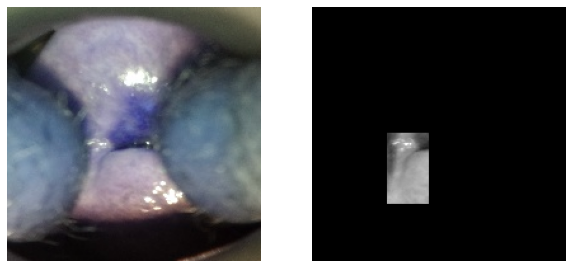

In [ ]:
class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)

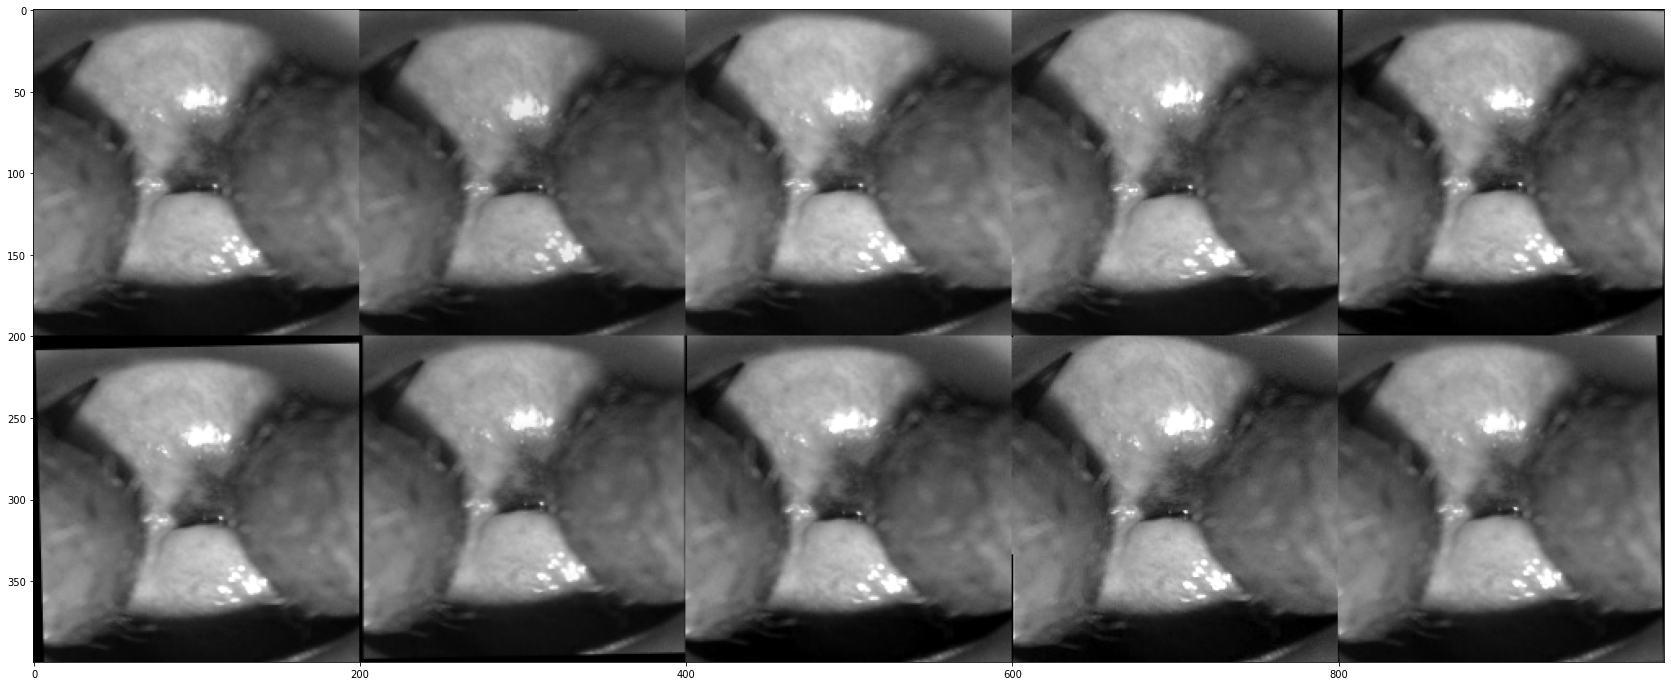

In [ ]:
# Image augmentation (light but constant)
augmentation = iaa.Sequential([
    iaa.OneOf([ ## geometric transform
        iaa.Affine(
            scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
            translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
            rotate=(-2, 2),
            shear=(-1, 1),
        ),
        iaa.PiecewiseAffine(scale=(0.001, 0.025)),
    ]),
    iaa.OneOf([ ## brightness or contrast
        iaa.Multiply((0.9, 1.1)),
        iaa.ContrastNormalization((0.9, 1.1)),
    ]),
    iaa.OneOf([ ## blur or sharpen
        iaa.GaussianBlur(sigma=(0.0, 0.1)),
        iaa.Sharpen(alpha=(0.0, 0.1)),
    ]),
])

# test on the same image as above
imggrid = augmentation.draw_grid(image[:, :, 0], cols=5, rows=2)
plt.figure(figsize=(30, 12))
_ = plt.imshow(imggrid[:, :, 0], cmap='gray')


In [ ]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=ROOT_DIR)

# Exclude the last layers because they require a matching
# number of classes
model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

AttributeError: ignored

In [ ]:
LEARNING_RATE = 0.006
# Train Mask-RCNN Model 
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
print(tf.__version__)

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
%%time
## train heads with higher lr to speedup the learning
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE*2,
            epochs=2,
            layers='heads',
            augmentation=None)  ## no need to augment yet

history = model.keras_model.history.history

In [ ]:
%%time
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE,
            epochs=6,
            layers='all',
            augmentation=augmentation)

new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]

In [ ]:
%%time
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE/5,
            epochs=16,
            layers='all',
            augmentation=augmentation)

new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]

In [ ]:
epochs = range(1,len(next(iter(history.values())))+1)
pd.DataFrame(history, index=epochs)

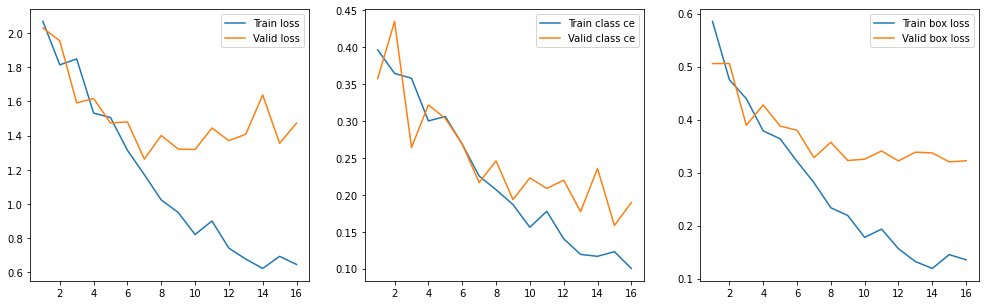

In [ ]:
plt.figure(figsize=(17,5))

plt.subplot(131)
plt.plot(epochs, history["loss"], label="Train loss")
plt.plot(epochs, history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(epochs, history["mrcnn_class_loss"], label="Train class ce")
plt.plot(epochs, history["val_mrcnn_class_loss"], label="Valid class ce")
plt.legend()
plt.subplot(133)
plt.plot(epochs, history["mrcnn_bbox_loss"], label="Train box loss")
plt.plot(epochs, history["val_mrcnn_bbox_loss"], label="Valid box loss")
plt.legend()


In [ ]:
best_epoch = np.argmin(history["val_loss"])
print("Best Epoch:", best_epoch + 1, history["val_loss"][best_epoch])

Best Epoch: 7 1.2616092681884765


In [ ]:

model_path = '/content/cervical20200411T1852/mask_rcnn_cervical_0007.h5'
print('Found model {}'.format(model_path))

Found model /content/cervical20200411T1852/mask_rcnn_cervical_0007.h5


In [ ]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=ROOT_DIR)

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/cervical20200411T1852/mask_rcnn_cervical_0007.h5
Re-starting from epoch 7


In [ ]:
# set color for class
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 0:
            colors.append((.941, .204, .204))
        if class_id == 1:
            colors.append(( .204,.941, .204))
        if class_id == 2:
            colors.append(( .204, .204,.941))
        
    return colors

(256, 256, 3)

*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 

(256, 256, 3)

*** No instances to display *** 

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


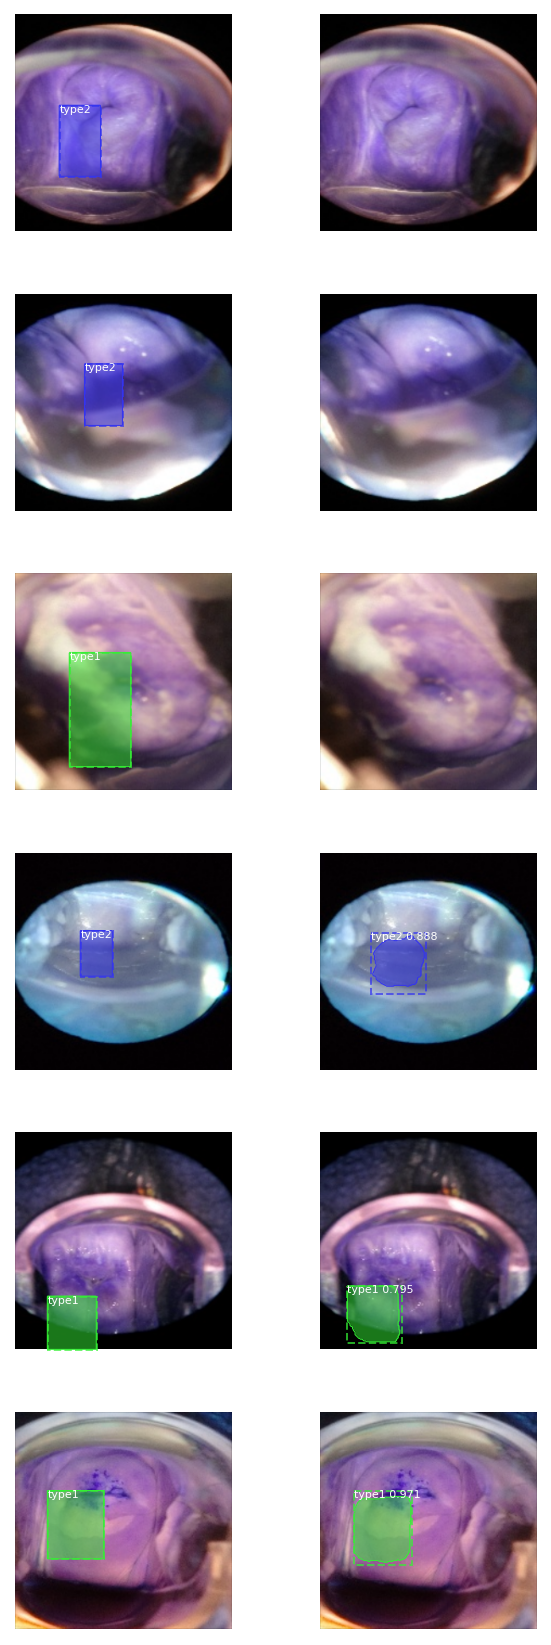

In [ ]:
dataset = dataset_val
fig = plt.figure(figsize=(10, 30))





for i in range(6):

    image_id = random.choice(dataset.image_ids)
    
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config, 
                               image_id, use_mini_mask=False)
    print(original_image.shape)
    plt.subplot(6, 2, 2*i + 1)
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                                dataset.class_names,
                                colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])
    plt.subplot(6, 2, 2*i + 2)
    results = model.detect([original_image]) #, verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                                dataset.class_names, r['scores'], 
                                colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])

In [ ]:
orig

[array([1], dtype=int32),
 array([0], dtype=int32),
 array([], dtype=int32),
 array([2], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32)]

In [ ]:
final

[array([2], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32),
 array([], dtype=int32),
 array([1], dtype=int32),
 array([1], dtype=int32)]

In [ ]:
orig = []
pred = []
for i in tqdm(range(300)):
  image_id = dataset.image_ids[i]
  # print(image_id)
  original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config, 
                               image_id, use_mini_mask=False)
  #print(original_image.shape)
  results = model.detect([original_image]) #, verbose=1)
  r = results[0]
  #print(r['class_ids'])
  orig.append(gt_class_id)
  pred.append(r['class_ids'])

  #break


100%|██████████| 300/300 [00:26<00:00, 11.51it/s]


In [ ]:
for i in range(len(pred)):
  if(len(pred[i]) == 0):
    pred[i] = 3
  
  elif(len(pred[i] == 1)):
    pred[i] = pred[i][0]


In [ ]:
for i in range(len(orig)):
  if(len(orig[i]) == 0):
    orig[i] = 3
  
  elif(len(orig[i] == 1)):
    orig[i] = orig[i][0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(orig, pred)

array([[  0,  41,   2,   7],
       [  0, 112,   2,  36],
       [  0,  17,  28,  52],
       [  0,   1,   0,   2]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f1,_ = precision_recall_fscore_support(orig, pred, average='macro')

In [ ]:
print('precision--' , p,'recall--',r,'f1 score--',f1)

precision-- 0.38764732923373724 recall-- 0.4254982817869416 f1 score-- 0.2929819604433819


In [ ]:
print('accuracy of type1:', str(int(112*100/(112+2+36)))+'%')
print('accuracy of type2:' , str(int(28*100/(52+28+17)))+'%')
print('total accuracy:' ,str((int(112*100/(112+2+36))+int(28*100/(52+28+17)))/2)+'%'  )

accuracy of type1: 74%
accuracy of type2: 28%
total accuracy: 51.0%


In [ ]:
from sklearn.metrics import classification_report

#Check for 1 and 2 these tell about all the stuff regarding type1 and type2


print(classification_report(orig, pred) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.65      0.75      0.70       150
           2       0.88      0.29      0.43        97
           3       0.02      0.67      0.04         3

    accuracy                           0.47       300
   macro avg       0.39      0.43      0.29       300
weighted avg       0.61      0.47      0.49       300

